<h2>Unit 6 Live Session </center> </h2>
<h4> W203 Instructional Team </h4>

<h4> Sampling Distributions and the Central Limit Theorem </h4>

<a href="https://imgflip.com/i/2b7ve4"><img src="https://i.imgflip.com/2b7ve4.jpg" title="made at imgflip.com"/></a>

#### Class Announcements
1. Announcement 1
2. Announcement 2
3. Announcement 3

#### 1.0 Sampling Distributions

**1.1**  What is the difference between the population distribution of a random variable $X$ and the sampling distribution of a statistic based on $n$ observations from $X$?

>The population distribution (CDF) of a random variable $X$ is the probability that $X$ takes on a value less than or equal to any given number $a \in \mathbb{R}$.

>The sampling distribution (CDF) of a statistics based on $n$ observations from $X$ is the probability that the statistic takes on a value less than or equal to any given number $a \in \mathbb{R}$. 

>It is determined by the population distribution of $X$ and the manner in which sampling is conducted. In other words it is the probability of a sample of size $n$ will be drawn which results in a values of the statistics which is less than $a$. 

**1.2** Why do we want to know things about the sampling distribution of a statistic?

> When we know something about the sampling distribution of a statistic it allows us to make probabilistic statements about likelihood of drawing a sample which results in some value of the statistics. 

>For example if make a statement like "We assume that the distribution of $X$ has a standard normal distribution with $E(X) = 0$ and $V(X) = 1$" and then we take a sample of 100 observations from $X$ and calculate $\overline{X} = -5$, knowing the sampling distribution of $\overline{X}$ in this case might lead us to say that the probability of this (or smaller) value of the statistic is so small we might question the validity of our initial assumption. 

#### 2.0 Sampling from Bernoulli Distribution

Recall that a Bernoulli random variable with parameter $p$ takes on just two values: 1, with probability $p$; and 0, with probability $1-p$.  We choose this variable because (1) it's very simple, and (2) its distribution is distinctly non-normal. 

Oddly it turns out that (base) R doesn't have a Bernoulli function.  To simulate draws from a Bernoulli variable, you can either ...

**2.1** Use R's 'sample' command to select values from {0,1}

In [1]:
n=3
p = 0.5
sample(c(0,1), 3, prob = c(1-p,p), replace = TRUE)

[1] 0 0 1

**2.2** Note that the Bernoulli distribution is a special case of the more general binomial distribution, with the binomial size parameter set to 1.  R has an rbinom function that lets you draw from this distribution.

In [2]:
rbinom(3, size=1, prob=0.5)

[1] 1 0 0

<a href="https://imgflip.com/i/2b8myf"><img src="https://i.imgflip.com/2b8myf.jpg" title="made at imgflip.com"/></a>

#### 3.0 A Fair Coin

Here we recreate the demonstration of the CLT seen in the async. However instead of using the Old Faithful data, you are to take random draws from a Bernoulli distribution.

**3.1** First, set p = 0.5 so your population distribution is symmeteric.  Use a variable $n$ to represent your sample size.  Initially, set $n=3$.

In [3]:
nobs <- 3
p <- 0.5

** 3.2 **
Simulate n draws from a Bernoulli variable with parameter $p$, then compute the sample mean.

In [4]:
obs1 <- rbinom(n,size=1,prob=p)
obs1

[1] 0 0 1

In [5]:
mean(obs1)

[1] 0.3333333

**3.3** 
Write code to replicate the above experiment 100,000 times, storing all of the resulting sample means.  Create a histogram of your result.  Compute the standard deviation of the result.

[1] 0.2881022

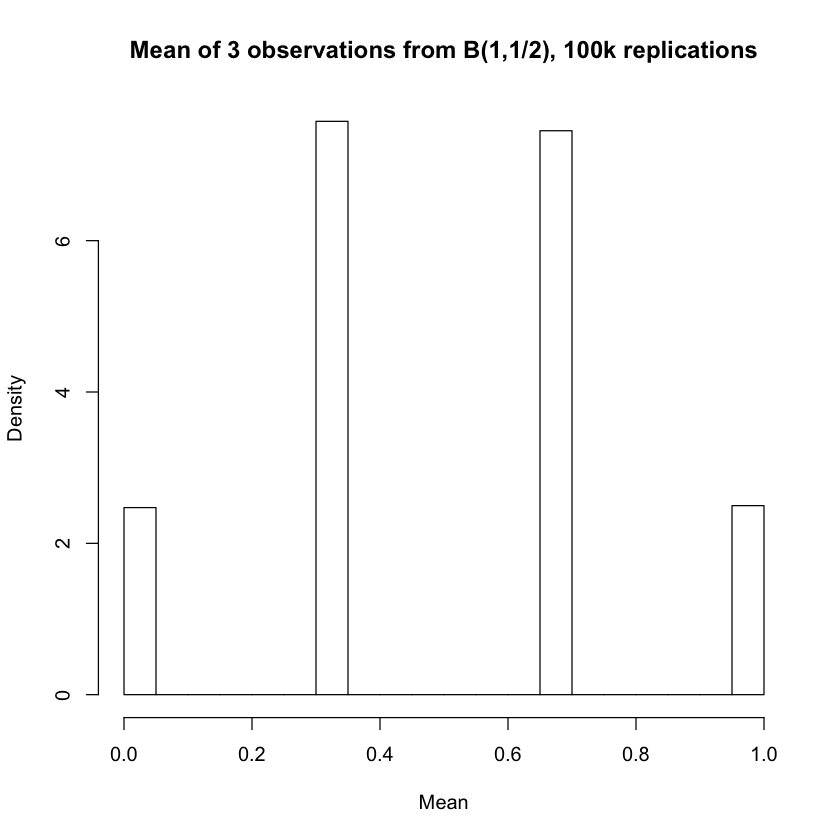

In [6]:
#options(repr.plot.height = 10, repr.plot.width = 15, repr.plot.pointsize = 22)
mean_obs_rep1 <- replicate(100000, mean(rbinom(nobs,size=1,prob=p)))
sd(mean_obs_rep1)
hist(mean_obs_rep1, main = "Mean of 3 observations from B(1,1/2), 100k replications"
                  , freq = FALSE, xlab = "Mean")

**3.4** Increase n to 30, replicate the experiment 100,000 times, storing all of the resulting sample means.  Create a histogram of your result.  Compute the standard deviation of the result.

[1] 0.09118753

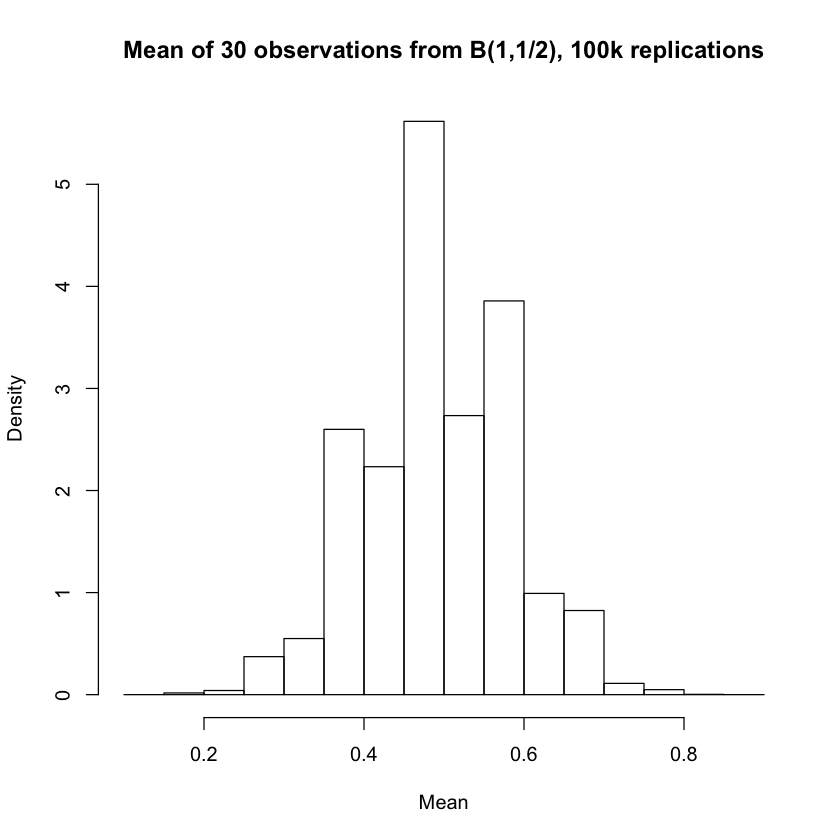

In [7]:
nobs = 30 
mean_obs_rep1 <- replicate(100000, mean(rbinom(nobs,size=1,prob=p)))
sd(mean_obs_rep1)
hist(mean_obs_rep1, main = "Mean of 30 observations from B(1,1/2), 100k replications"
                  , freq = FALSE, xlab = "Mean")

** 3.5 **   Mathematically, what effect will increasing the number of observations $n$ in each sample have on standard deviation of the sampling distribution of the mean? Do the results of **3.3** and **3.4** reflect this?

>The standard deviation of the sampling distribution should decrease since if $\{X_i\}_{i=1}^n$ is i.i.d then 
$$ V(\overline{X}) = \frac{V(X)}{n} \;\;\;\; \text{ and } \;\;\;\; \frac{V(X)}{30} <  \frac{V(X)}{3} $$

> Yes the sample standard deviation with $n=30$ is significantly smaller than the standard deviation when $n=3$

** 3.6 ** Experiment with different values of $n$ and note the point at which the sampling distribution of the mean 'looks' normal to you.

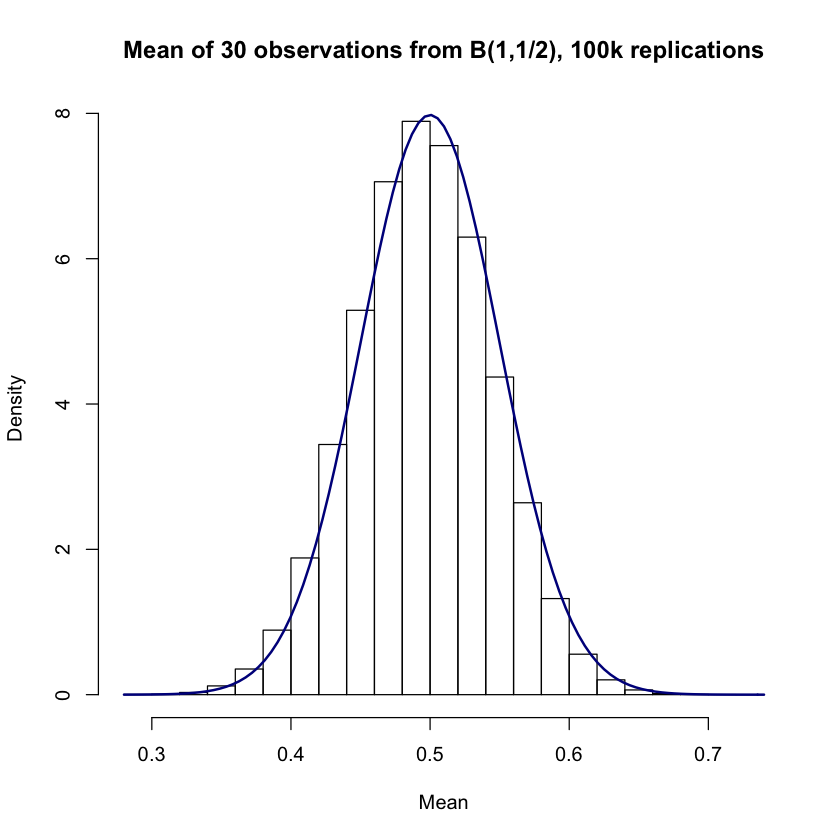

In [8]:
nobs = 100
mean_obs_rep2 <- replicate(100000, mean(rbinom(nobs,size=1,prob=p)))
hist(mean_obs_rep2,breaks = 25, main = "Mean of 30 observations from B(1,1/2), 100k replications"
                  , freq = FALSE, xlab = "Mean")
curve(dnorm(x, mean=p, sd=sqrt(p*(1-p)/nobs)), 
          col="darkblue", lwd=2, add=TRUE, yaxt="n")

#### 4.0 A Skewed Distribution

Now let p = 0.001.  This result is a highly skewed Bernoulli variable.  We are especially interested to see how skewed the sampling distribution of the mean will be for different sample sizes.

For this activity, you can simply assess the skew of a distribution visually.  If you prefer, you can also use the skewness command in the moments package.  You may hear a rule of thumb that a skewness less than -1 or greater than 1 is considered substantially skewed.

**4.1** Rerun the previous exercise for n = 3, p = 0.001 and note the shape of the sampling distribution.

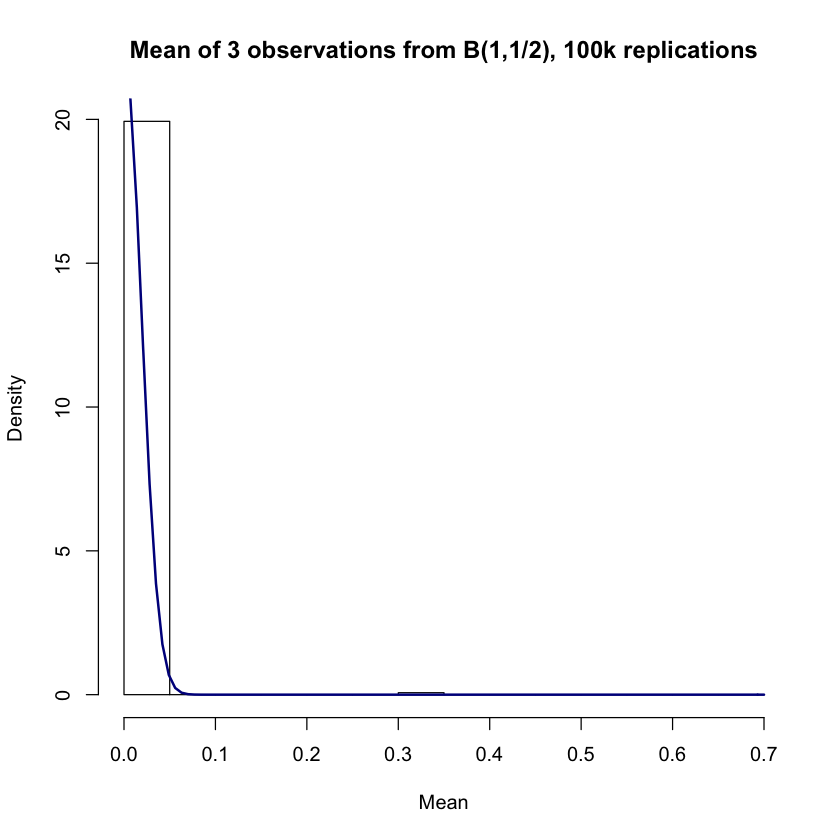

In [9]:
nobs = 3 
p = 0.001
mean_obs_rep1 <- replicate(100000, mean(rbinom(nobs,size=1,prob=p)))
hist(mean_obs_rep1, main = "Mean of 3 observations from B(1,1/2), 100k replications"
                  , freq = FALSE, xlab = "Mean")
curve(dnorm(x, mean=p, sd=sqrt(p*(1-p)/nobs)), 
          col="darkblue", lwd=2, add=TRUE, yaxt="n")

** 4.2 ** Increase n to 30, and note the shape of the sampling distribution.

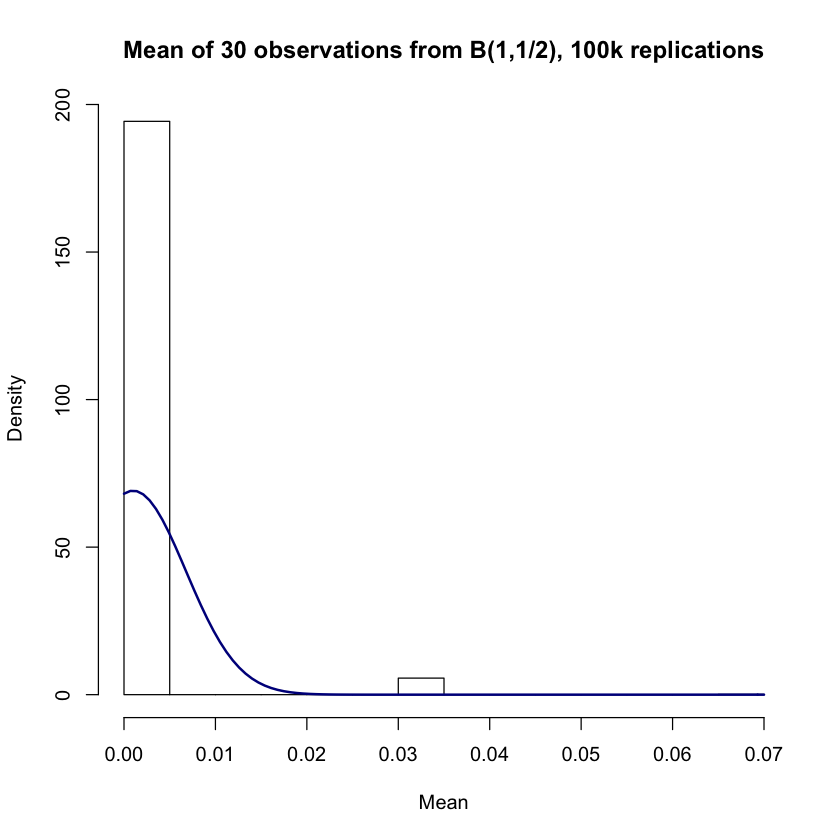

In [10]:
nobs = 30 
p = 0.001
mean_obs_rep1 <- replicate(100000, mean(rbinom(nobs,size=1,prob=p)))
hist(mean_obs_rep1, main = "Mean of 30 observations from B(1,1/2), 100k replications"
                  , freq = FALSE, xlab = "Mean")
curve(dnorm(x, mean=p, sd=sqrt(p*(1-p)/nobs)), 
          col="darkblue", lwd=2, add=TRUE, yaxt="n")

** 4.3 ** As before, experiment with different values of $n$ and note the point at which the sampling distribution looks normal.

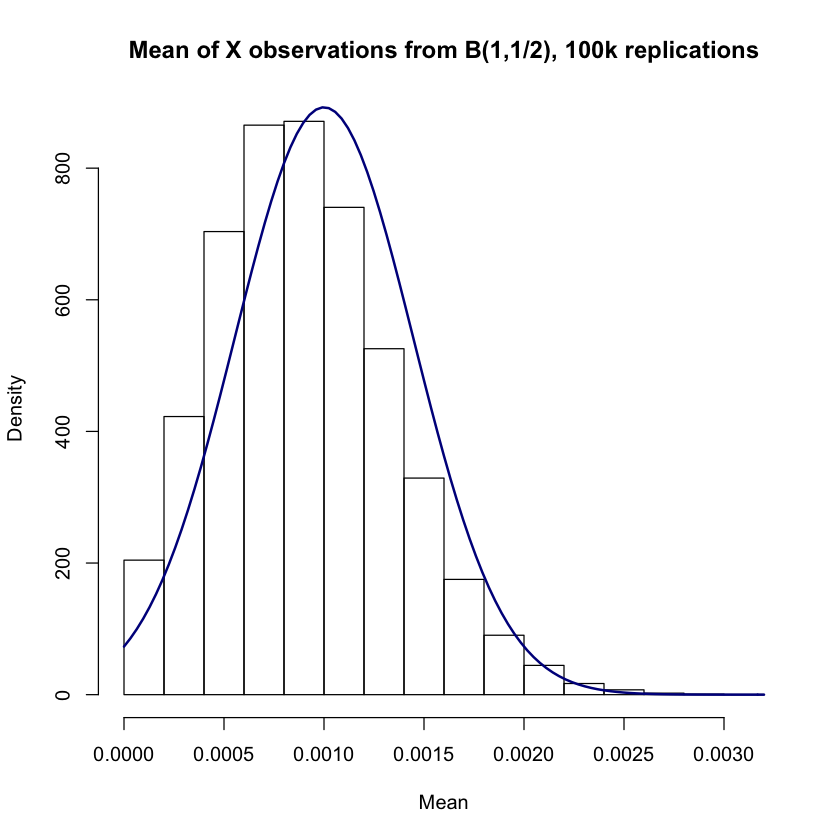

In [11]:
nobs = 5000 
p = 0.001
mean_obs_rep1 <- replicate(100000, mean(rbinom(nobs,size=1,prob=p)))
hist(mean_obs_rep1, main = "Mean of X observations from B(1,1/2), 100k replications"
                  , freq = FALSE, xlab = "Mean")
curve(dnorm(x, mean=p, sd=sqrt(p*(1-p)/nobs)), 
          col="darkblue", lwd=2, add=TRUE, yaxt="n")

#### 5.0 Discussion 
Here we discuss the result of our analysis.

**5.1** How does the skewness of the distribution of the underlying varaible $X$ affect the applicability of the Central Limit Theorem to sample mean $\overline{X}_n$?

> As the distribution of the underlying random variable $X$ that we are sampling (or taking observations from) from becomes increasingly skewed the number of observations needed for the sampling distribution of $\overline{X}_n$ to be "approximately" normal increases.

** 5.2 ** Why do we care about this / why is this fact important?

> In future weeks we will want to perform inference on sample statistics, in particular $\overline{X}_n$.In other words we will want to say more about $\overline{X}_n$ than just it value, but that requires us to know or approximate its sampling distribution.

> To do so we will rely heavily on an assumptions that the distribution of the sample statistic is well approximated by the normal distribution.  

> As a result we will want to check whether the distribution of the underlying random variable $X$ is not "too skewed" relative to the number of observations $n$ in order invoke the CLT. 

**5.3** Name a variable you would be interested in measuring that has a substatially skewed distribution.

> Income those who live and work in Sausalito CA. 

**5.4** The Cauchy Distribution is a well-known distribution with some interesting mathematical properties.  In particular, it has "infinite" variance  That is, the variance does not exist because the tails are too spread out.  

Would exercises **3.0 ** and **4.0**  work if you took draws from a Cauchy distribution?

> No the CLT requires the variance to be finite. 